# Kastelenkaart: Landschapsatlas

Visualisatie met betrekking tot kastelen en landgoederen

## Initialisatie

In [1]:
# Downloader
import requests

# Dataprocessing
import pandas as pd
pd.options.display.max_rows = 10
from itertools import chain
import xml.etree.ElementTree as ET

# deal with shitty coordinates
import pyproj

# Display methods
import pprint
pp = pprint.PrettyPrinter(indent=1, width=80, depth=3, stream=None)

# Plotting library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

## Download Landschapsatlas

### Metadata

Spreek het basis WFS punt aan om die info te krijgen

In [23]:
# Download the XML
all_features = "http://services.rce.geovoorziening.nl/landschapsatlas/wfs?&request=GetCapabilities&service=WFS&SRSName=urn:x-ogc:def:crs:EPSG:4326"
resp = requests.get(all_features)
parsedXML = ET.fromstring(resp.text)

# Parse XML to usable list
featurelist = []
for item in parsedXML:
    if item.tag == "{http://www.opengis.net/wfs/2.0}FeatureTypeList":
        for subitem in item:
            for subitemProp in subitem:
                if subitemProp.tag == "{http://www.opengis.net/wfs/2.0}Name":
                    featurelist.append(subitemProp.text)

### Get all features

In [24]:
# download data
feature_data = {}
for feature in featurelist:     
    link = f"http://services.rce.geovoorziening.nl/landschapsatlas/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName={feature}&outputFormat=application%2Fjson"
    resp = requests.get(link)
    feature_data[feature] = resp.json()


In [25]:
# add buitenplaatsen
link = "http://services.rce.geovoorziening.nl/buitenplaatsen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=Buitenplaatsen&outputFormat=json&SRSName=urn:x-ogc:def:crs:EPSG:4326"
resp = requests.get(link)
feature_data['buitenplaatsen'] = resp.json()


In [26]:
# summery = [f'{key}: {value["totalFeatures"]}' for key, value in feature_data.items()]
# pp = pprint.PrettyPrinter(indent=1, width=80, depth=3, stream=None)
# pp.pprint(feature_data['buitenplaatsen']["features"][:1])

## Kastelen

In [27]:
# castles only
castles_list = [{"id": value["id"], **value["geometry"], **value["properties"]} for value in feature_data["landschapsatlas:kastelen"]["features"]]
castles_df = pd.DataFrame(castles_list)

estate_list = [{"id": value["id"], **value["geometry"], **value["properties"]} for value in feature_data["buitenplaatsen"]["features"]]
estate_df = pd.DataFrame(estate_list)

In [33]:
display(castles_df)
display(estate_df)

,bbox,bijschrift,cchin,coordinates,datering,foto_groot,foto_thumb,gid,id,info_link,legenda,naam,plaats,provincie,rijksmonnr,type,typering,zichtbaar
0,"[190380, 325970, 190380, 325970]",Albert Speelman,000007,"[190380, 325970]",1382,https://images.memorix.nl/rce/thumb/1600x1600/...,https://images.memorix.nl/rce/thumb/350x350/51...,1,kastelen.1,https://www.cchin.nl/index.xql?object=000007,Intact,De Dael / Oelsbroeck,Nuth,Limburg,30919,Point,Intact,J
1,"[205620, 435270, 205620, 435270]",Albert Speelman,000009,"[205620, 435270]",1363,https://images.memorix.nl/rce/thumb/1600x1600/...,https://images.memorix.nl/rce/thumb/350x350/c2...,2,kastelen.2,https://www.cchin.nl/index.xql?object=000009,Intact,Huis Babberich / Huis Halsaf,Babberich,Gelderland,519901,Point,Intact,J
2,"[204250, 435700, 204250, 435700]",Albert Speelman,000010,"[204250, 435700]",1527,https://images.memorix.nl/rce/thumb/1600x1600/...,https://images.memorix.nl/rce/thumb/350x350/b9...,3,kastelen.3,https://www.cchin.nl/index.xql?object=000010,Intact,Camphuysen,Oud-Zevenaar,Gelderland,40415,Point,Intact,J
3,"[206750, 468190, 206750, 468190]",Albert Speelman,000011,"[206750, 468190]",1555,https://images.memorix.nl/rce/thumb/1600x1600/...,https://images.memorix.nl/rce/thumb/350x350/2d...,4,kastelen.4,https://www.cchin.nl/index.xql?object=000011,Intact,De (nieuwe) Poll / Huis Gietelo,Bussloo,Gelderland,530102,Point,Intact,J
4,"[215970, 471310, 215970, 471310]",Albert Speelman,000014,"[215970, 471310]",1348,https://images.memorix.nl/rce/thumb/1600x1600/...,https://images.memorix.nl/rce/thumb/350x350/53...,5,kastelen.5,https://www.cchin.nl/index.xql?object=000014,Muurwerk in latere bebouwing,Huis Dorth,Kring van Dorth,Gelderland,516389,Point,Muurwerk in latere bebouwing,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,"[31109, 387536, 31109, 387536]",Albert Speelman,001648,"[31109, 387536]",1162,https://images.memorix.nl/rce/thumb/1600x1600/...,https://images.memorix.nl/rce/thumb/350x350/51...,523,kastelen.523,https://www.cchin.nl/index.xql?object=001648,Restant,Oost-Souburg (ringwalburg),Oost-Souburg,Zeeland,46096,Point,Ringwal,J
523,"[31850, 391589, 31850, 391589]",Cyclomedia Globespotter,001865,"[31850, 391589]",875-900,https://images.memorix.nl/rce/thumb/1600x1600/...,https://images.memorix.nl/rce/thumb/350x350/05...,524,kastelen.524,https://www.cchin.nl/index.xql?object=001865,Ringwalburg,Ringwalburg Middelburg,Middelburg,Zeeland,Onbeschermd,Point,Ringwal,J
524,"[31103, 387534, 31103, 387534]",Albert Speelman,002024,"[31103, 387534]",875-900,https://images.memorix.nl/rce/thumb/1600x1600/...,https://images.memorix.nl/rce/thumb/350x350/d2...,525,kastelen.525,https://www.cchin.nl/index.xql?object=002024,Ringwalburg,Ringwalburg Oost-Souburg,Oost-Souburg,Zeeland,46096,Point,Ringwal,J
525,"[260174, 489770, 260174, 489770]",Cyclomedia Globespotter,002845,"[260174, 489770]",9e/10e eeuw,https://images.memorix.nl/rce/thumb/1600x1600/...,https://images.memorix.nl/rce/thumb/350x350/c1...,526,kastelen.526,https://www.cchin.nl/index.xql?object=002845,Ringwalburg,Volthe-Hunenborg,Volthe,Overijssel,46005,Point,Ringwal,J


,BEGRENSDAT,CENTROID_X,CENTROID_Y,Fotobijsch,Fotogroot,Fotothumb,GEO_ID,INSCHRIJF,NAAM,ONDERGROND,OPPERV_HA,OPPERV_KM2,OPPERV_M2,RIJKSMONNR,STATUS,URL,bbox,coordinates,id,type
0,2002-04-09T22:00:00Z,165449.19635,539860.00183,Beeldbank RCE,https://images.memorix.nl/rce/thumb/fullsize/5...,https://images.memorix.nl/rce/thumb/350x350/5f...,141,2003-05-26T22:00:00Z,Riniastate,LKI/GBKN,3.824,0.038,38236.045,526280,juridisch,https://monumentenregister.cultureelerfgoed.nl...,"[52.844679694625604, 5.540002479185526, 52.847...","[[[[52.844679694625604, 5.543712494949765], [5...",Buitenplaatsen.1,MultiPolygon
1,2002-04-09T22:00:00Z,141915.14572,476376.07917,,http://rce.webgispublisher.nl/user/uploads/log...,http://rce.webgispublisher.nl/user/uploads/log...,130,2002-03-03T23:00:00Z,Oud Crailoo,LKI/GBKN,3.649,0.036,36488.236,524269,juridisch,https://monumentenregister.cultureelerfgoed.nl...,"[52.274082504259255, 5.192496376618256, 52.275...","[[[[52.27582908220688, 5.193973434506232], [52...",Buitenplaatsen.2,MultiPolygon
2,2002-06-05T22:00:00Z,104194.53082,492993.46277,Albert Speelman,https://images.memorix.nl/rce/thumb/fullsize/8...,https://images.memorix.nl/rce/thumb/350x350/8e...,157,2001-05-21T22:00:00Z,Spaarnberg,LKI/GBKN,19.301,0.193,193005.764,512284,juridisch,https://monumentenregister.cultureelerfgoed.nl...,"[52.41992522493346, 4.635458347834756, 52.4256...","[[[[52.42276620732263, 4.638271302035457], [52...",Buitenplaatsen.3,MultiPolygon
3,2002-10-29T23:00:00Z,157168.14618,457063.81908,Beeldbank RCE,https://images.memorix.nl/rce/thumb/fullsize/3...,https://images.memorix.nl/rce/thumb/350x350/3f...,52,2004-09-12T22:00:00Z,De Boom,LKI/GBKN,30.095,0.301,300954.234,524207,juridisch,https://monumentenregister.cultureelerfgoed.nl...,"[52.0970362262511, 5.41439447124945, 52.106101...","[[[[52.105844477499296, 5.421913705318745], [5...",Buitenplaatsen.4,MultiPolygon
4,2003-08-18T22:00:00Z,198651.78204,348544.90966,Beeldbank RCE,https://images.memorix.nl/rce/thumb/fullsize/8...,https://images.memorix.nl/rce/thumb/350x350/87...,35,2006-09-04T22:00:00Z,Aerwinkel,LKI/GBKN,50.316,0.503,503159.237,527760,juridisch,https://monumentenregister.cultureelerfgoed.nl...,"[51.11999115608892, 6.001791878572474, 51.1316...","[[[[51.12874000258445, 6.013440848177757], [51...",Buitenplaatsen.5,MultiPolygon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2013-04-07T22:00:00Z,145416.09432,469833.92904,Albert Speelman,https://images.memorix.nl/rce/thumb/fullsize/9...,https://images.memorix.nl/rce/thumb/350x350/95...,2121,1999-10-12T22:00:00Z,Groeneveld,LKI/GBKN,107.474,1.075,1074739.155,511772,juridisch,https://monumentenregister.cultureelerfgoed.nl...,"[52.21279823418924, 5.231688570883146, 52.2214...","[[[[52.21326870943654, 5.246575745835755], [52...",Buitenplaatsen.529,MultiPolygon
529,2013-04-09T22:00:00Z,167058.24578,443691.86370,Wikipedia Commons,http://upload.wikimedia.org/wikipedia/commons/...,http://upload.wikimedia.org/wikipedia/commons/...,1764,1999-04-21T22:00:00Z,Remmerstein,LKI/GBKN,7.327,0.073,73267.370,509899,juridisch,https://monumentenregister.cultureelerfgoed.nl...,"[51.98032078635346, 5.559441689911281, 51.9826...","[[[[51.982154573880564, 5.559441689911281], [5...",Buitenplaatsen.530,MultiPolygon
530,2006-06-25T22:00:00Z,108555.58480,398740.43422,Beeldbank RCE,https://images.memorix.nl/rce/thumb/fullsize/a...,https://images.memorix.nl/rce/thumb/350x350/ab...,192,2006-12-20T23:00:00Z,Zoudtland,LKI/GBKN,15.701,0.157,157005.702,515501,juridisch,https://monumentenregister.cultureelerfgoed.nl...,"[51.573436955411125, 4.713440038729752, 51.577...","[[[[51.57779895230841, 4.719776520402702], [51...",Buitenplaatsen.531,MultiPolygon
531,2013-04-09T22:00:00Z,184478.62658,491796.39539,Albert Speelman,https://images.memorix.nl/rce/thumb/fullsize/7...,https://images.memorix.nl/rce/thumb/350x350/78...,2122,2004-06-13T22:00:00Z,Klarenbeek,LKI/GBKN,17.241,0.172,172405.087,512015,juridisch,https://monumentenregi

In [29]:
## Show all the images

In [135]:
from IPython.display import Image
from ipywidgets import GridBox, Layout, Image

images = [Image.from_url(image, layout=Layout(width='10px')) for image in estate_df["Fotothumb"]]
# images = [Image.from_url(image, layout=Layout(width='10px')) for image in estate_df["Fotothumb"][:10]]
for image in images:
    image.width = "100px"
    
display(GridBox(children=images, layout=Layout(
            width='100%',
            grid_template_rows='repeat(5, 110px)',
            grid_template_columns="repeat(10, 110px)")))  

GridBox(children=(Image(value=b'https://images.memorix.nl/rce/thumb/350x350/5f1415b7-d7ab-e7b0-c889-962c28db31…

## MonumentenDB

In [142]:
monumenten_df = pd.read_csv("data/monument_object.csv")

In [145]:
monumenten_selected_df = monumenten_df[monumenten_df["OBJ_CBSCODE_ZKP"] == 'Kastelen, landh. ed.']
monumenten_selected_df

,OBJ_NUMMER,OBJ_CODE,OBJ_RIJKSNUMMER,COM_NUMMER,HRK_CODE,HRK_VOLGNUMMER,OBJ_NAAM,OCB_CODE,OBJ_IND_PROJ,OBJ_X_COORD,...,PLA_NAAM,BUW_NAAM,MIG_NAAM,OBJ_CBSCODE_ZKP,OBJ_DIENSTAAND_ZKP,OBJ_WETSARTIKEL_ZKP,OBJ_IND_BEBWKOM_ZKP,OBJ_IND_PROJ_ZKP,ADRES,MAPINFO_ID
6568,6779,NaN,6779,NaN,NaN,NaN,Vergulde Eenhoorn,NaN,NaN,123192.0,...,Amsterdam,NaN,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Ringdijk 58, Locatie: Watergraafsmeer, 1097 AH...",NaN
6793,7024,NaN,7024,NaN,NaN,NaN,Geyn,NaN,NaN,128220.0,...,Baambrugge,NaN,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Rijksstraatweg 89, 1396 JG te Baambrugge (De R...",NaN
6794,7025,NaN,7025,NaN,NaN,NaN,NaN,NaN,NaN,128393.0,...,Baambrugge,NaN,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Rijksstraatweg 103, 1396 JH te Baambrugge (De ...",NaN
6795,7026,NaN,7026,NaN,NaN,NaN,NaN,NaN,NaN,128690.0,...,Baambrugge,NaN,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Rijksstraatweg 125, 1396 JJ te Baambrugge (De ...",NaN
6848,7082,NaN,7082,NaN,NaN,NaN,Hamsterborg,NaN,NaN,223710.0,...,Den Ham,NaN,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Sietse Veldstraweg 25, 9833 TA te Den Ham (Wes...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62386,1022107,NaN,530986,1003019.0,NaN,NaN,Groeneveld,NaN,NaN,178412.0,...,Hulshorst,NaN,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,buiten bebouwde kom,NaN,"Harderwijkerweg 388, 8077 RL te Hulshorst (Nun...",NaN
62400,1022129,NaN,531015,1003026.0,NaN,NaN,Rijnoord,NaN,NaN,120954.0,...,Woerden,NaN,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,buiten bebouwde kom,Verbetervoorstellen algemeen,"Oostdam 12, 3441 EN te Woerden (UT)",NaN
62406,1022135,NaN,531022,1003027.0,NaN,NaN,'t Gasthuis,NaN,NaN,183250.0,...,Bemelen,NaN,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,buiten bebouwde kom,NaN,"Gasthuis 55, 6268 NN te Bemelen (Eijsden-Margr...",NaN
62538,1022317,NaN,531226,1003069.0,NaN,NaN,Over Holland,NaN,NaN,128862.0,...,Nieuwersluis,NaN,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,buiten bebouwde kom,NaN,"Rijksstraatweg 14, 3631 AC te Nieuwersluis (St...",NaN


## Generate map

In [111]:
# do conversions
from pyproj import CRS, Transformer

# setup conversions
crs_4326 = CRS.from_epsg(4326)
crs_28992 = CRS.from_epsg(28992)
transformer = Transformer.from_crs(crs_28992, crs_4326)

In [113]:
# estates
coords = estate_df.apply(lambda row: transformer.transform(row["CENTROID_X"], row["CENTROID_Y"]), axis=1)

# add to df
estate_df_geom = estate_df.copy()
estate_df_geom["centoid_lat"] = list(zip(*coords))[0]
estate_df_geom["centoid_lon"] = list(zip(*coords))[1]

# print the lat lon
# estate_df_geom

In [114]:
# castles
coords = castles_df.apply(lambda row: transformer.transform(row["coordinates"][0], row["coordinates"][1]), axis=1)

# add to df
castles_df_geom = castles_df.copy()
castles_df_geom["lat"] = list(zip(*coords))[0]
castles_df_geom["lon"] = list(zip(*coords))[1]

# print the lat lon
# castles_df_geom

In [153]:
coords = monumenten_selected_df.apply(lambda row: transformer.transform(row["OBJ_X_COORD"], row["OBJ_Y_COORD"]), axis=1)

monuments_df_geom = monumenten_selected_df.copy()
monuments_df_geom["lat"] = list(zip(*coords))[0]
monuments_df_geom["lon"] = list(zip(*coords))[1]

monuments_df_geom

,OBJ_NUMMER,OBJ_CODE,OBJ_RIJKSNUMMER,COM_NUMMER,HRK_CODE,HRK_VOLGNUMMER,OBJ_NAAM,OCB_CODE,OBJ_IND_PROJ,OBJ_X_COORD,...,MIG_NAAM,OBJ_CBSCODE_ZKP,OBJ_DIENSTAAND_ZKP,OBJ_WETSARTIKEL_ZKP,OBJ_IND_BEBWKOM_ZKP,OBJ_IND_PROJ_ZKP,ADRES,MAPINFO_ID,lat,lon
6568,6779,NaN,6779,NaN,NaN,NaN,Vergulde Eenhoorn,NaN,NaN,123192.0,...,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Ringdijk 58, Locatie: Watergraafsmeer, 1097 AH...",NaN,52.351255,4.920352
6793,7024,NaN,7024,NaN,NaN,NaN,Geyn,NaN,NaN,128220.0,...,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Rijksstraatweg 89, 1396 JG te Baambrugge (De R...",NaN,52.242666,4.995109
6794,7025,NaN,7025,NaN,NaN,NaN,NaN,NaN,NaN,128393.0,...,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Rijksstraatweg 103, 1396 JH te Baambrugge (De ...",NaN,52.241362,4.997653
6795,7026,NaN,7026,NaN,NaN,NaN,NaN,NaN,NaN,128690.0,...,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Rijksstraatweg 125, 1396 JJ te Baambrugge (De ...",NaN,52.236946,5.002040
6848,7082,NaN,7082,NaN,NaN,NaN,Hamsterborg,NaN,NaN,223710.0,...,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,onbekend,NaN,"Sietse Veldstraweg 25, 9833 TA te Den Ham (Wes...",NaN,53.276475,6.417245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62386,1022107,NaN,530986,1003019.0,NaN,NaN,Groeneveld,NaN,NaN,178412.0,...,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,buiten bebouwde kom,NaN,"Harderwijkerweg 388, 8077 RL te Hulshorst (Nun...",NaN,52.364600,5.730929
62400,1022129,NaN,531015,1003026.0,NaN,NaN,Rijnoord,NaN,NaN,120954.0,...,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,buiten bebouwde kom,Verbetervoorstellen algemeen,"Oostdam 12, 3441 EN te Woerden (UT)",NaN,52.087723,4.890451
62406,1022135,NaN,531022,1003027.0,NaN,NaN,'t Gasthuis,NaN,NaN,183250.0,...,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,buiten bebouwde kom,NaN,"Gasthuis 55, 6268 NN te Bemelen (Eijsden-Margr...",NaN,50.843434,5.788270
62538,1022317,NaN,531226,1003069.0,NaN,NaN,Over Holland,NaN,NaN,128862.0,...,NaN,"Kastelen, landh. ed.",NaN,rijksmonument,buiten bebouwde kom,NaN,"Rijksstraatweg 14, 3631 AC te Nieuwersluis (St...",NaN,52.190380,5.004957


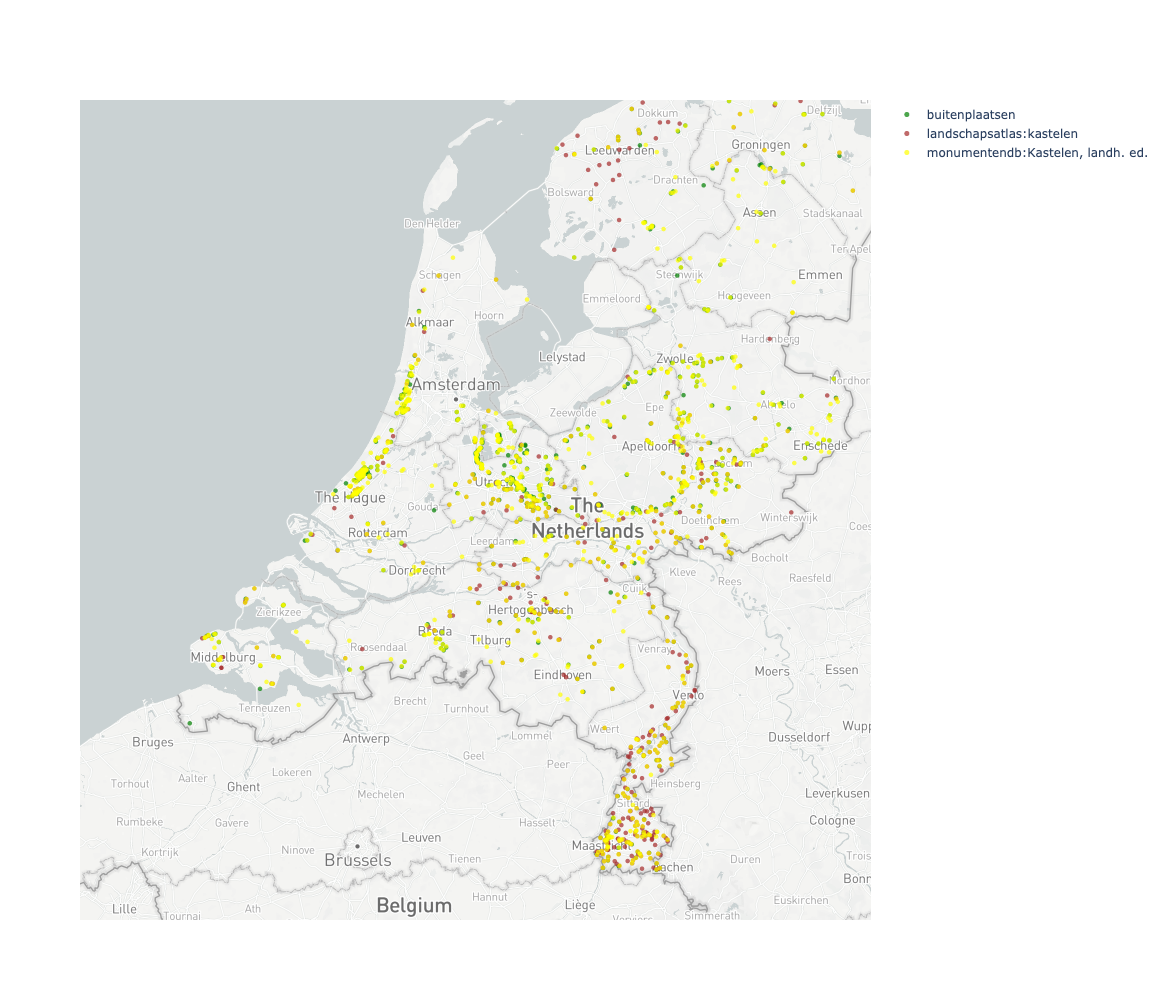

In [150]:
def create_map_trace(lat, lon, color, name, text):
    return go.Scattermapbox(
            lat=lat,
            lon=lon,
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=5,
                color=color,
                opacity=0.7
            ),
            name=name,
            text=text
        )
    

def create_map():
    mapbox_access_token = "pk.eyJ1IjoiemF0dXJyYnkiLCJhIjoiY2p3cmt3dGk3MWt5dTQ4bGU5NHR6bThwbSJ9.rqpHAUIbAXdex-iVEWsVdQ"
    
    estate_trace = create_map_trace(estate_df_geom["centoid_lat"], estate_df_geom["centoid_lon"], "green", "buitenplaatsen", estate_df_geom["NAAM"])
    castles_trace = create_map_trace(castles_df_geom["lat"], castles_df_geom["lon"],  "brown", "landschapsatlas:kastelen", castles_df_geom["naam"])
    monuments_trace = create_map_trace(monuments_df_geom["lat"], monuments_df_geom["lon"],  "yellow", "monumentendb:Kastelen, landh. ed.", monuments_df_geom["OBJ_NAAM"])
    
    
    fig = go.Figure([estate_trace, castles_trace, monuments_trace])
    fig.update_layout(
        hovermode='closest',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=go.layout.mapbox.Center(
                lat=52,
                lon=5
            ),
            pitch=0,
            zoom=7
        ),
        height=1000
    )

    return fig


iplot(create_map(), filename='map')
# display(create_map())



In [151]:
import chart_studio as cs
import chart_studio.plotly as py

cs.tools.set_credentials_file(username='zaturrby', api_key='lMIugdWipeja7h1EHs50')
py.plot(create_map(), filename='landgoed_1', auto_open=False)

'https://plot.ly/~zaturrby/2/'

In [ ]:
url